In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de los datos y Análisis Exploratorio de los datos

In [3]:
df = pd.read_excel("Muestra-Supertienda.xlsx",sheet_name="Compras")
df.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Método de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Provincia/Estado/Departamento,País/Región,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia
0,1682,MX-2023-111899,2023-04-02,2023-04-06,Estándar,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,Brasil,Sur,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4
1,5919,MX-2023-113922,2023-10-08,2023-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10000647,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8
2,5920,MX-2023-113922,2023-10-08,2023-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MAT-CA-10002956,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0,5,0.0,11.0
3,9013,MX-2021-163888,2021-06-14,2021-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-MO-10002100,Mobiliario,Mobiliario,"Tenex Bandeja apiladora, Negro",504.6,3,0.0,95.4
4,9014,MX-2021-163888,2021-06-14,2021-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10002747,Mobiliario,Librerías,"Safco Vitrina, Convencional",3376.8,3,0.0,641.4


In [154]:
#Verificación de datos, se nota que las columnas no contienen valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Id. de la fila                 10254 non-null  int64         
 1   Id. del pedido                 10254 non-null  object        
 2   Fecha del pedido               10254 non-null  datetime64[ns]
 3   Fecha de envío                 10254 non-null  datetime64[ns]
 4   Método de envío                10254 non-null  object        
 5   Id. del cliente                10254 non-null  object        
 6   Nombre del cliente             10254 non-null  object        
 7   Segmento                       10254 non-null  object        
 8   Ciudad                         10254 non-null  object        
 9   Provincia/Estado/Departamento  10254 non-null  object        
 10  País/Región                    10254 non-null  object        
 11  Región         

In [155]:
#Eliminar fila irrelevante
df = df.drop("Id. de la fila", axis = 1)
df.columns

Index(['Id. del pedido', 'Fecha del pedido', 'Fecha de envío',
       'Método de envío', 'Id. del cliente', 'Nombre del cliente', 'Segmento',
       'Ciudad', 'Provincia/Estado/Departamento', 'País/Región', 'Región',
       'Id. del producto', 'Categoría', 'Subcategoría', 'Nombre del producto',
       'Ventas', 'Cantidad', 'Descuento', 'Ganancia'],
      dtype='object')

In [156]:
print("Estadísticas de la columna ventas: \n",df["Ventas"].describe(),"\n")
print("Estadísticas de la columna ganancias: \n",df["Ganancia"].describe())

Estadísticas de la columna ventas: 
 count    10254.000000
mean      2103.379037
std       3491.494504
min         15.660000
25%        328.800000
50%        803.960000
75%       2277.900000
max      34740.800000
Name: Ventas, dtype: float64 

Estadísticas de la columna ganancias: 
 count    10254.000000
mean       214.737238
std       1189.617598
min     -18062.400000
25%         -7.740000
50%         80.000000
75%        325.800000
max      13132.800000
Name: Ganancia, dtype: float64


In [157]:
print("Número de clientes total en el período 2020-2024:",df["Id. del cliente"].nunique())
print("Productos diferentes:",df["Id. del producto"].nunique())
print("Número de pedidos realizados:",df["Id. del pedido"].nunique())
print("Número de categorías:",df["Categoría"].nunique())
print("Número de subcategorías: ",df["Subcategoría"].nunique())

Número de clientes total en el período 2020-2024: 794
Productos diferentes: 2186
Número de pedidos realizados: 5120
Número de categorías: 3
Número de subcategorías:  17


### Se crean columnas de años y meses

In [195]:
df["year"] = df["Fecha del pedido"].dt.year
df["month"] = df["Fecha del pedido"].dt.month_name()

In [196]:
#Verificar clientes con más de un país
clientes_multipais = df.groupby("Nombre del cliente").agg(
    num_paises=("País/Región", "nunique"),
    paises=("País/Región", lambda x: ", ".join(x.unique()))
).sort_values(by="num_paises", ascending=False).reset_index()
clientes_multipais

,Nombre del cliente,num_paises,paises
0,Victoria Chavarría,11,"Brasil, Trinidad y Tobago, Argentina, Guatemal..."
1,Jeremías Orozco,11,"Colombia, México, Cuba, Brasil, Guatemala, Arg..."
2,Tobías Ramírez,10,"Honduras, Colombia, Venezuela, México, Cuba, P..."
3,Lara Varela,9,"Brasil, Argentina, Honduras, Venezuela, Nicara..."
4,Ari Verduzco,9,"México, Guatemala, Honduras, República Dominic..."
...,...,...,...
789,William Roldán,1,Guatemala
790,Armando Medina,1,México
791,Joaquín Saenz,1,México
792,Joaquina Meraz,1,Brasil


In [197]:
#Mostrar al top 10 de clientes por año
top_clientes_por_año = (
    df.groupby(["year", "Id. del cliente", "Nombre del cliente"])
    .agg(Ventas_totales=("Ventas", "sum"))
    .sort_values(["year", "Ventas_totales"], ascending=[True, False])
).round(2)

# Seleccionar los top 10 de cada año:
top_10_por_año = top_clientes_por_año.groupby("year").head(10).reset_index()

top_10_por_año.head(40)

,year,Id. del cliente,Nombre del cliente,Ventas_totales
0,2020,RA-20530,Romero Arévalo,57041.92
1,2020,CV-12385,Carina Verdes,44120.17
2,2020,KA-17350,Kristina Arroyo,43868.49
3,2020,DC-13465,Débora Cabrera,42286.64
4,2020,VA-21445,Valentina Acuna,41090.88
5,2020,NL-19525,Núria Laureano,40659.12
6,2020,JS-17095,José Sánchez,40404.35
7,2020,JH-16750,José Hernández,40345.64
8,2020,IB-16180,Iris Barena,39199.92
9,2020,AJ-11695,Alina Jasón,39176.08


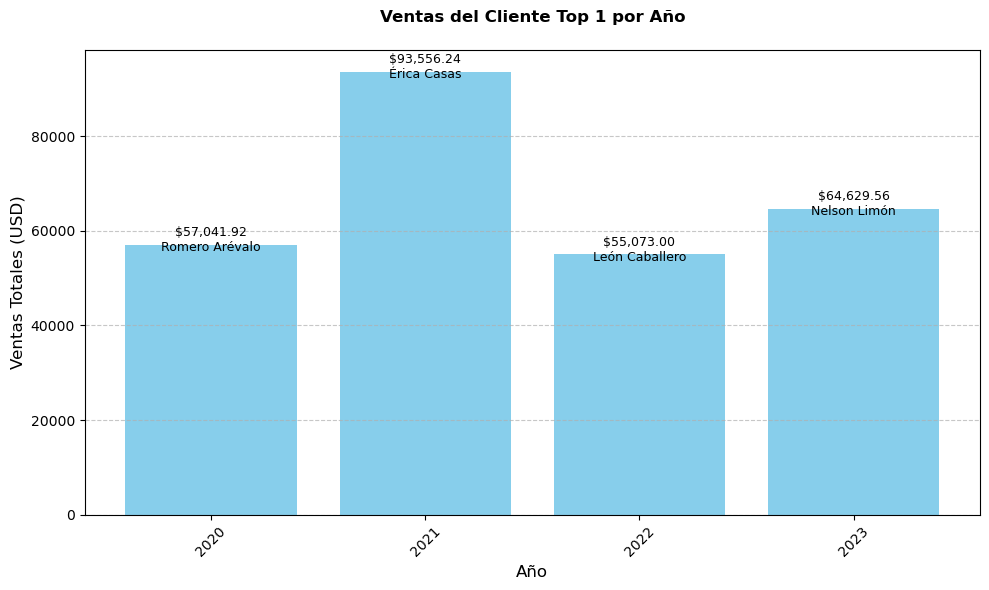

In [ ]:
#Mostrar ventas de clientes top 1 anuales
top_1_por_año = top_10_por_año.groupby("year").head(1)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_1_por_año["year"].astype(str), top_1_por_año["Ventas_totales"], color="skyblue")

# Añadir etiquetas personalizadas
for bar, venta, nombre in zip(bars, top_1_por_año["Ventas_totales"], top_1_por_año["Nombre del cliente"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() -2000,             
        f"${venta:,.2f}\n{nombre}",          
        ha="center",                         
        va="bottom",                         
       fontsize=9,
        color="black"
    )

# Ajustes estéticos
plt.title("Ventas del Cliente Top 1 por Año", fontweight="bold", pad=20)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ventas Totales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [199]:
#Mostrar al top 10 de productos vendidos por año
top_productos_per_year = (
    df.groupby(["year", "Id. del producto", "Nombre del producto"])
    .agg(Ventas_totales=("Ventas", "sum"))
    .sort_values(["year", "Ventas_totales"], ascending=[True, False])
).round(2)

# Seleccionar los top 10 de cada año:
top_10_products_year = top_productos_per_year.groupby("year").head(10).reset_index()

top_10_products_year.head(40)

,year,Id. del producto,Nombre del producto,Ventas_totales
0,2020,TEC-TE-10000708,"Samsung Cargador, Al por mayor",59382.40
1,2020,TEC-TE-10002989,"Nokia Cargador, Tamaño completo",55237.00
2,2020,MOB-SI-10002001,"Novimex Sillón, 2",48474.40
3,2020,MAT-EL-10002387,"Hoover Horno, Negro",41646.00
4,2020,TEC-TE-10001258,"Samsung Cargador, Tamaños variados",40896.00
5,2020,MOB-LI-10000767,"Dania Librería clásica, Convencional",35599.20
6,2020,MOB-SI-10004718,"SAFCO Sillón, Ajustable",32783.68
7,2020,MAT-EL-10003502,"KitchenAid Frigorífico, Plateado",31721.40
8,2020,MOB-SI-10002802,"Novimex Sillón, Negro",31582.72
9,2020,MOB-SI-10000941,"Novimex Sillón, Rojo",30530.00


In [200]:
#Mostrar las subcategorías con más ventas por año
top_subcategories_per_year = (
    df.groupby(["year", "Categoría","Subcategoría"])
    .agg(Ventas_totales=("Ventas", "sum"))
    .sort_values(["year", "Ventas_totales"], ascending=[True, False])
).round(2)

# Seleccionar los top 10 de cada año:
top_10_sc_year = top_subcategories_per_year.groupby("year").head(10).reset_index()

top_10_sc_year.head(40)

,year,Categoría,Subcategoría,Ventas_totales
0,2020,Tecnología,Teléfonos,562930.28
1,2020,Tecnología,Copiadoras,547938.54
2,2020,Mobiliario,Sillas,545038.68
3,2020,Mobiliario,Librerías,539036.84
4,2020,Material de oficina,Electrodomésticos,372217.68
5,2020,Mobiliario,Mesas,259150.12
6,2020,Material de oficina,Almacenamiento,245610.84
7,2020,Tecnología,Accesorios,227798.32
8,2020,Tecnología,Máquinas,89284.34
9,2020,Mobiliario,Mobiliario,77199.36


In [202]:
#Mostrar los meses con más ventas por año
top_month_per_year = (
    df.groupby(["year", "month"])
    .agg(Ventas_totales=("Ventas", "sum"))
    .sort_values(["year", "Ventas_totales"], ascending=[True, False])
).round(2)

# Seleccionar los top 6 meses de cada año:
top_6_months_year = top_month_per_year.groupby("year").head(12).reset_index()

top_6_months_year

,year,month,Ventas_totales
0,2020,December,604994.55
1,2020,October,558129.57
2,2020,September,461752.13
3,2020,November,452913.98
4,2020,June,392480.76
5,2020,May,258287.05
6,2020,August,225159.58
7,2020,July,223869.41
8,2020,January,218330.26
9,2020,April,172722.03


# Conclusiones

## 2020:
### - El cliente más importante fue: Romero Árevalo con $57,041.92 en compras.
### - El producto más ventas fue: TEC-TE-10000708	Samsung Cargador, Al por mayor con una venta de $59,382.40
### - La categoría más comprada fue: Tecnología - Teléfonos con una venta de $56,2930.28

# 2021:
### - El cliente más importante fue: Érica Casas $93556.24 en compras.
### - El producto más ventas fue: TEC-TE-10001258 Samsung Cargador, Tamaños variados con una venta de $67,308.00
### - La categoría más comprada fue: Tecnología	- Copiadoras $705,531.72

# 2022:
### - El cliente más importante fue: León Caballero	con $55073.00 en compras.
### - El producto más ventas fue: TEC-TE-10000050	Cisco Cargador, Tamaño completo con una venta de $69,619.20
### - La categoría más comprada fue: Mobiliario - Sillas con una venta de $90,4078.88

# 2023:
### - El cliente más importante fue: Nelson Limón con $64,629.56 en compras.
### - El producto con más ventas fue: MOB-SI-10000279	SAFCO Sillón, Rojo con una venta de $66,445.92
### - La categoría más comprada fue: Tecnología - Copiadoras con una venta de $1,055,896.14
